# Big Data and Predictive Analytics (CO7093)

## Coursework
### Group 105 

## Part 1: Building up a basic predictive model

### Data Cleaning and Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv('diabetic_data.csv')
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
#before data cleaning
dataset.shape

(101766, 50)

In [3]:
dataset.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [4]:
dataset.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
dataset.replace("?", np.nan, inplace=True)

In [6]:
dataset.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
dataset.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [8]:
dataset['readmitted'] = dataset['readmitted'].map({'<30': 1, '>30': 0, 'NO': 0})

In [9]:
column_data_types = dataset.dtypes
print("Data types of each column:")
print(column_data_types)

Data types of each column:
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              

In [10]:
# Calculate the percentage of missing values for each column
missing_percentage = (dataset.isnull().sum() / len(dataset)) * 100

# Print the percentage of missing values for each column
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repa

In [11]:
# Drop columns with near-zero variance
near_zero_variance_cols = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                           'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
                           'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin',
                           'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
                           'encounter_id', 'weight','race','max_glu_serum','A1Cresult','diag_1','diag_2','diag_3']

dataset.drop(near_zero_variance_cols, axis=1, inplace=True)

In [12]:
# Calculate the percentage of missing values for each column
missing_percentage = (dataset.isnull().sum() / len(dataset)) * 100
# Print the percentage of missing values for each column
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
patient_nbr                  0.000000
gender                       0.000000
age                          0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
number_diagnoses             0.000000
metformin                    0.000000
glipizide                    0.000000
glyburide                    0.000000
pioglitazone                 0.000000
rosiglitazone                0.000000
insulin                      0.000000
change                       0.000000
diabetesMed                  0.000000
readmitted                   0.000000
dtyp

In [13]:
dataset.dropna(inplace=True)

In [14]:
dataset.shape

(27915, 25)

In [15]:
# Calculate the percentage of missing values for each column
missing_percentage = (dataset.isnull().sum() / len(dataset)) * 100
# Print the percentage of missing values for each column
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
patient_nbr                 0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
number_diagnoses            0.0
metformin                   0.0
glipizide                   0.0
glyburide                   0.0
pioglitazone                0.0
rosiglitazone               0.0
insulin                     0.0
change                      0.0
diabetesMed                 0.0
readmitted                  0.0
dtype: float64


In [16]:
data_types = dataset.dtypes
# Identify numerical columns
numerical_columns = data_types[data_types != 'object'].index.tolist()
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
['patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']


In [17]:
import numpy as np

# Choose the numerical columns you want to check for outliers
numerical_columns = dataset.select_dtypes(include=np.number).columns.tolist()

outliers_percentage = {}

# Iterate over numerical columns
for column in numerical_columns:
    # Calculate Z-Score Method outliers
    z_scores = np.abs((dataset[column] - dataset[column].mean()) / dataset[column].std())
    outliers_zscore = (z_scores > 3)
    
    # Calculate percentage of outliers
    total_outliers = outliers_zscore.sum()
    total_count = len(dataset)
    percentage = (total_outliers / total_count) * 100
    
    outliers_percentage[column] = percentage

# Print percentage of outliers for each column
print("Percentage of outliers in each column using Z-score method:")
for column, percentage in outliers_percentage.items():
    print(f"{column}: {percentage:.2f}%")

Percentage of outliers in each column using Z-score method:
patient_nbr: 0.46%
admission_type_id: 2.56%
discharge_disposition_id: 3.53%
admission_source_id: 3.01%
time_in_hospital: 0.85%
num_lab_procedures: 0.05%
num_procedures: 0.00%
num_medications: 1.36%
number_outpatient: 1.81%
number_emergency: 1.11%
number_inpatient: 2.27%
number_diagnoses: 0.16%
readmitted: 0.00%


In [18]:
from scipy.stats import skew

# Columns to check skewness
columns_to_check = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Check skewness for each column
for column in columns_to_check:
    column_skewness = skew(dataset[column].dropna())
    print(f"Skewness of '{column}': {column_skewness}")


Skewness of 'admission_type_id': 0.721908045373293
Skewness of 'discharge_disposition_id': 3.426607459064109
Skewness of 'admission_source_id': 0.8139052812415577
Skewness of 'time_in_hospital': 1.1362140039161797
Skewness of 'num_lab_procedures': -0.2336922140066893
Skewness of 'num_procedures': 1.2204732272774252
Skewness of 'num_medications': 1.4829264539399654
Skewness of 'number_outpatient': 7.736329187278409
Skewness of 'number_emergency': 20.855816158347523
Skewness of 'number_inpatient': 3.847227477692924
Skewness of 'number_diagnoses': -0.6177063142895702


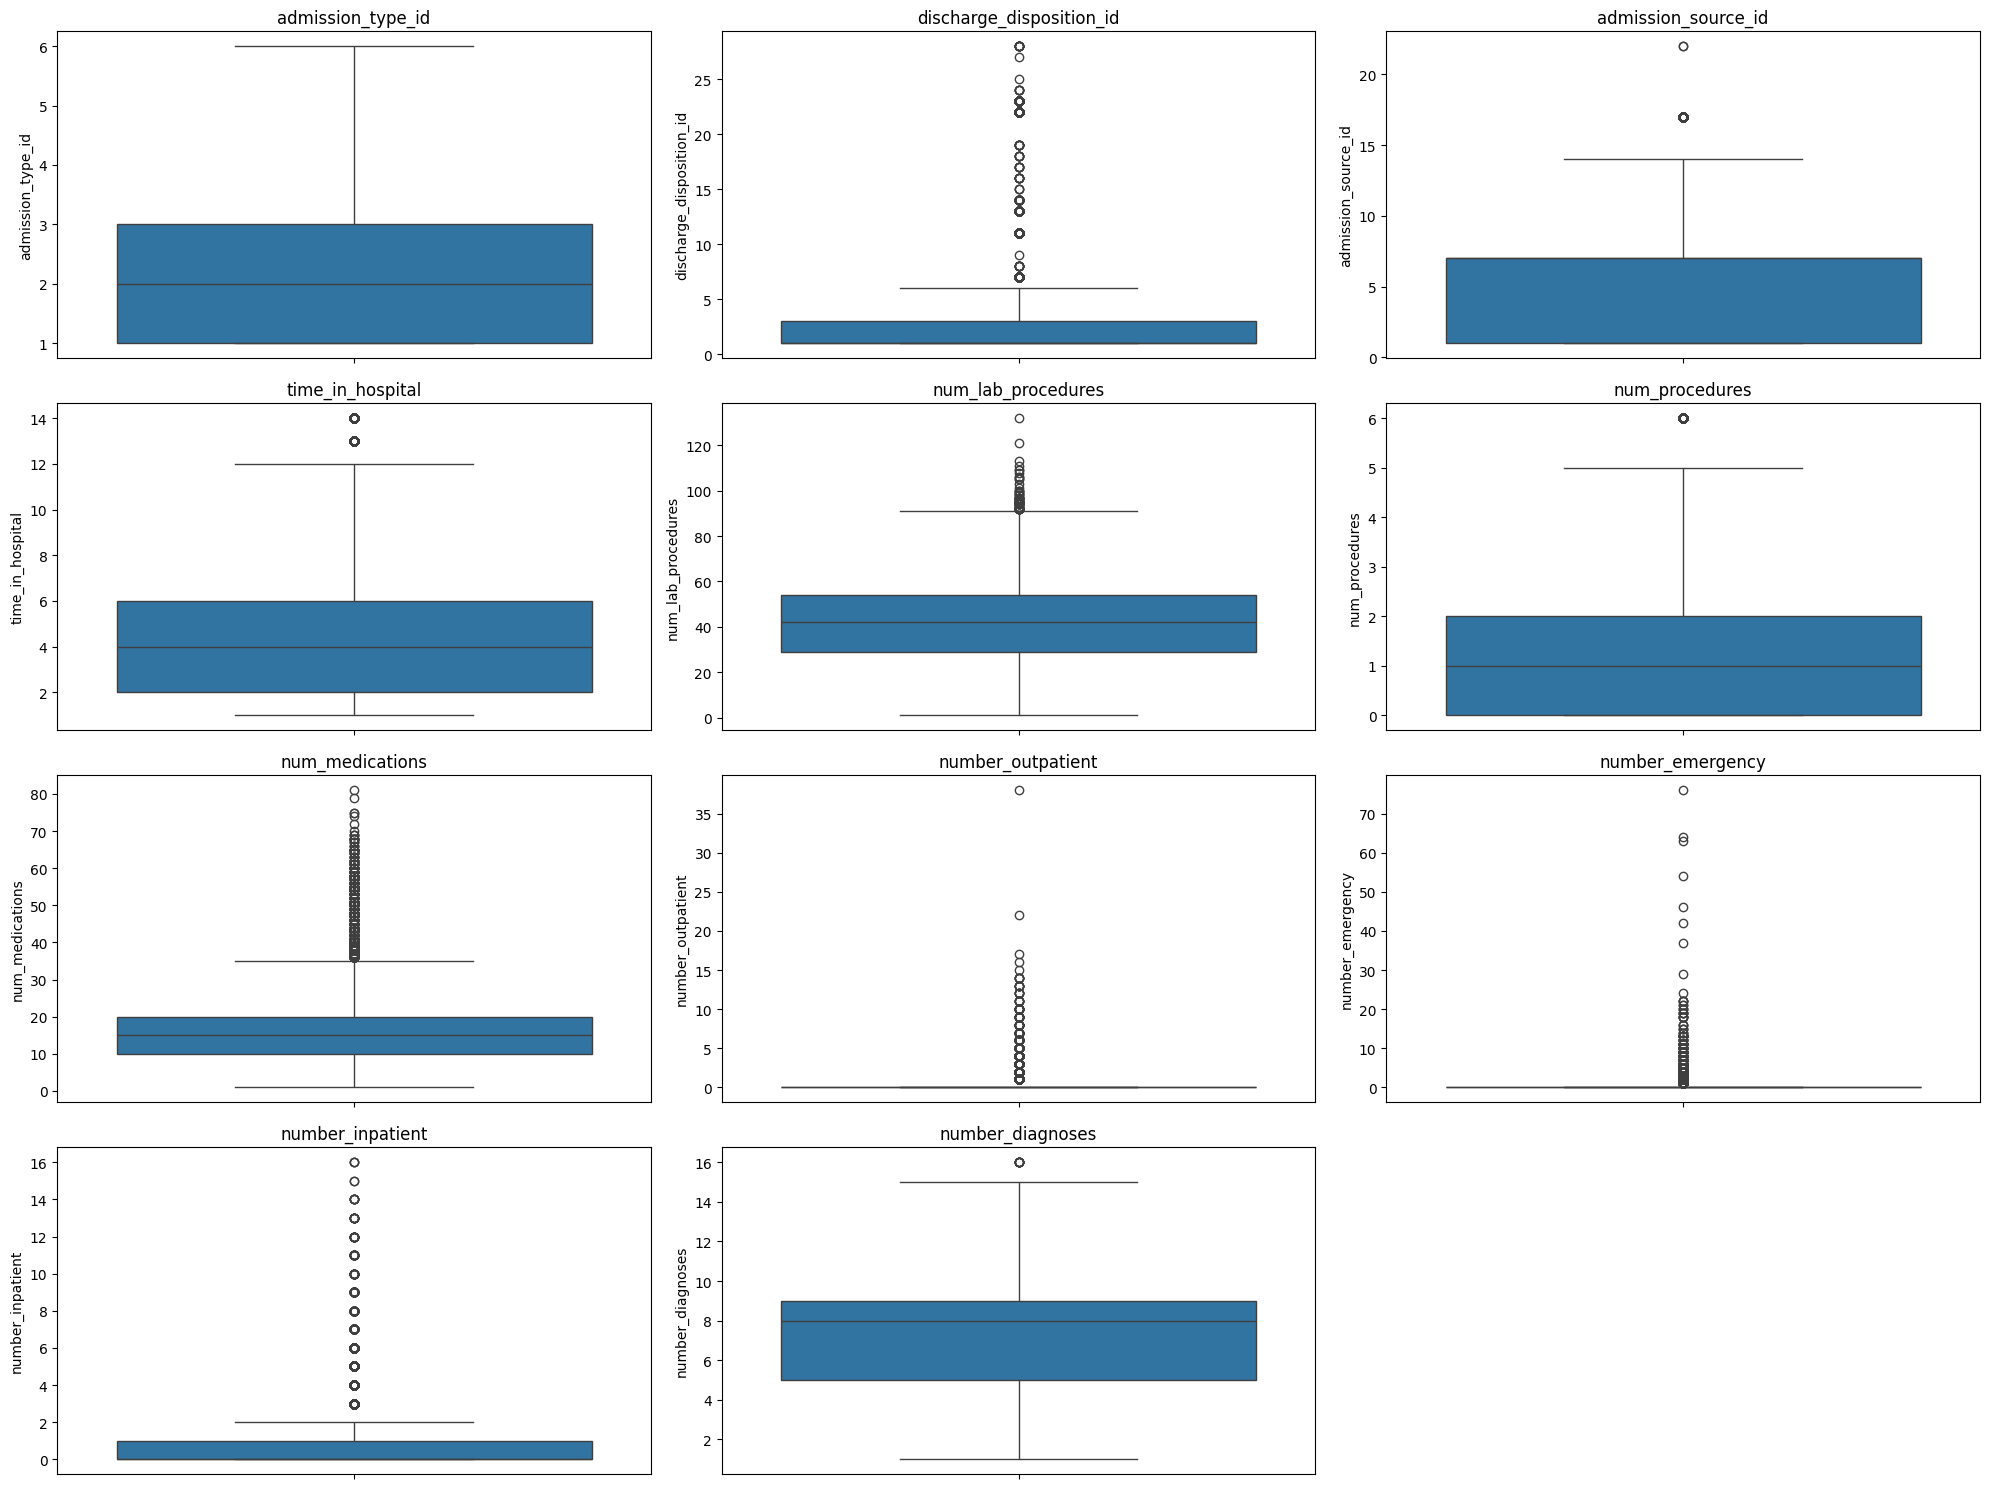

In [19]:
import seaborn as sns
features_boxplot = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Plotting the boxplots for each feature separately
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_boxplot, start=1):
    plt.subplot(4, 3, i)  # Adjust the grid size according to the number of features
    sns.boxplot(y=dataset[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust the layout to not overlap the plots
plt.show()

In [20]:
# Define the columns with high percentages of outliers
columns_with_outliers = ['discharge_disposition_id', 'num_procedures','num_lab_procedures','num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']

# Remove outliers from the specified columns
for column in columns_with_outliers:
    # Calculate Z-Scores
    z_scores = np.abs((dataset[column] - dataset[column].mean()) / dataset[column].std())
    
    # Define the threshold for outlier detection using Z-score (e.g., 3)
    threshold = 3
    
    # Remove outliers by filtering the DataFrame
    dataset = dataset[z_scores <= threshold]

In [21]:
dataset.shape

(25335, 25)

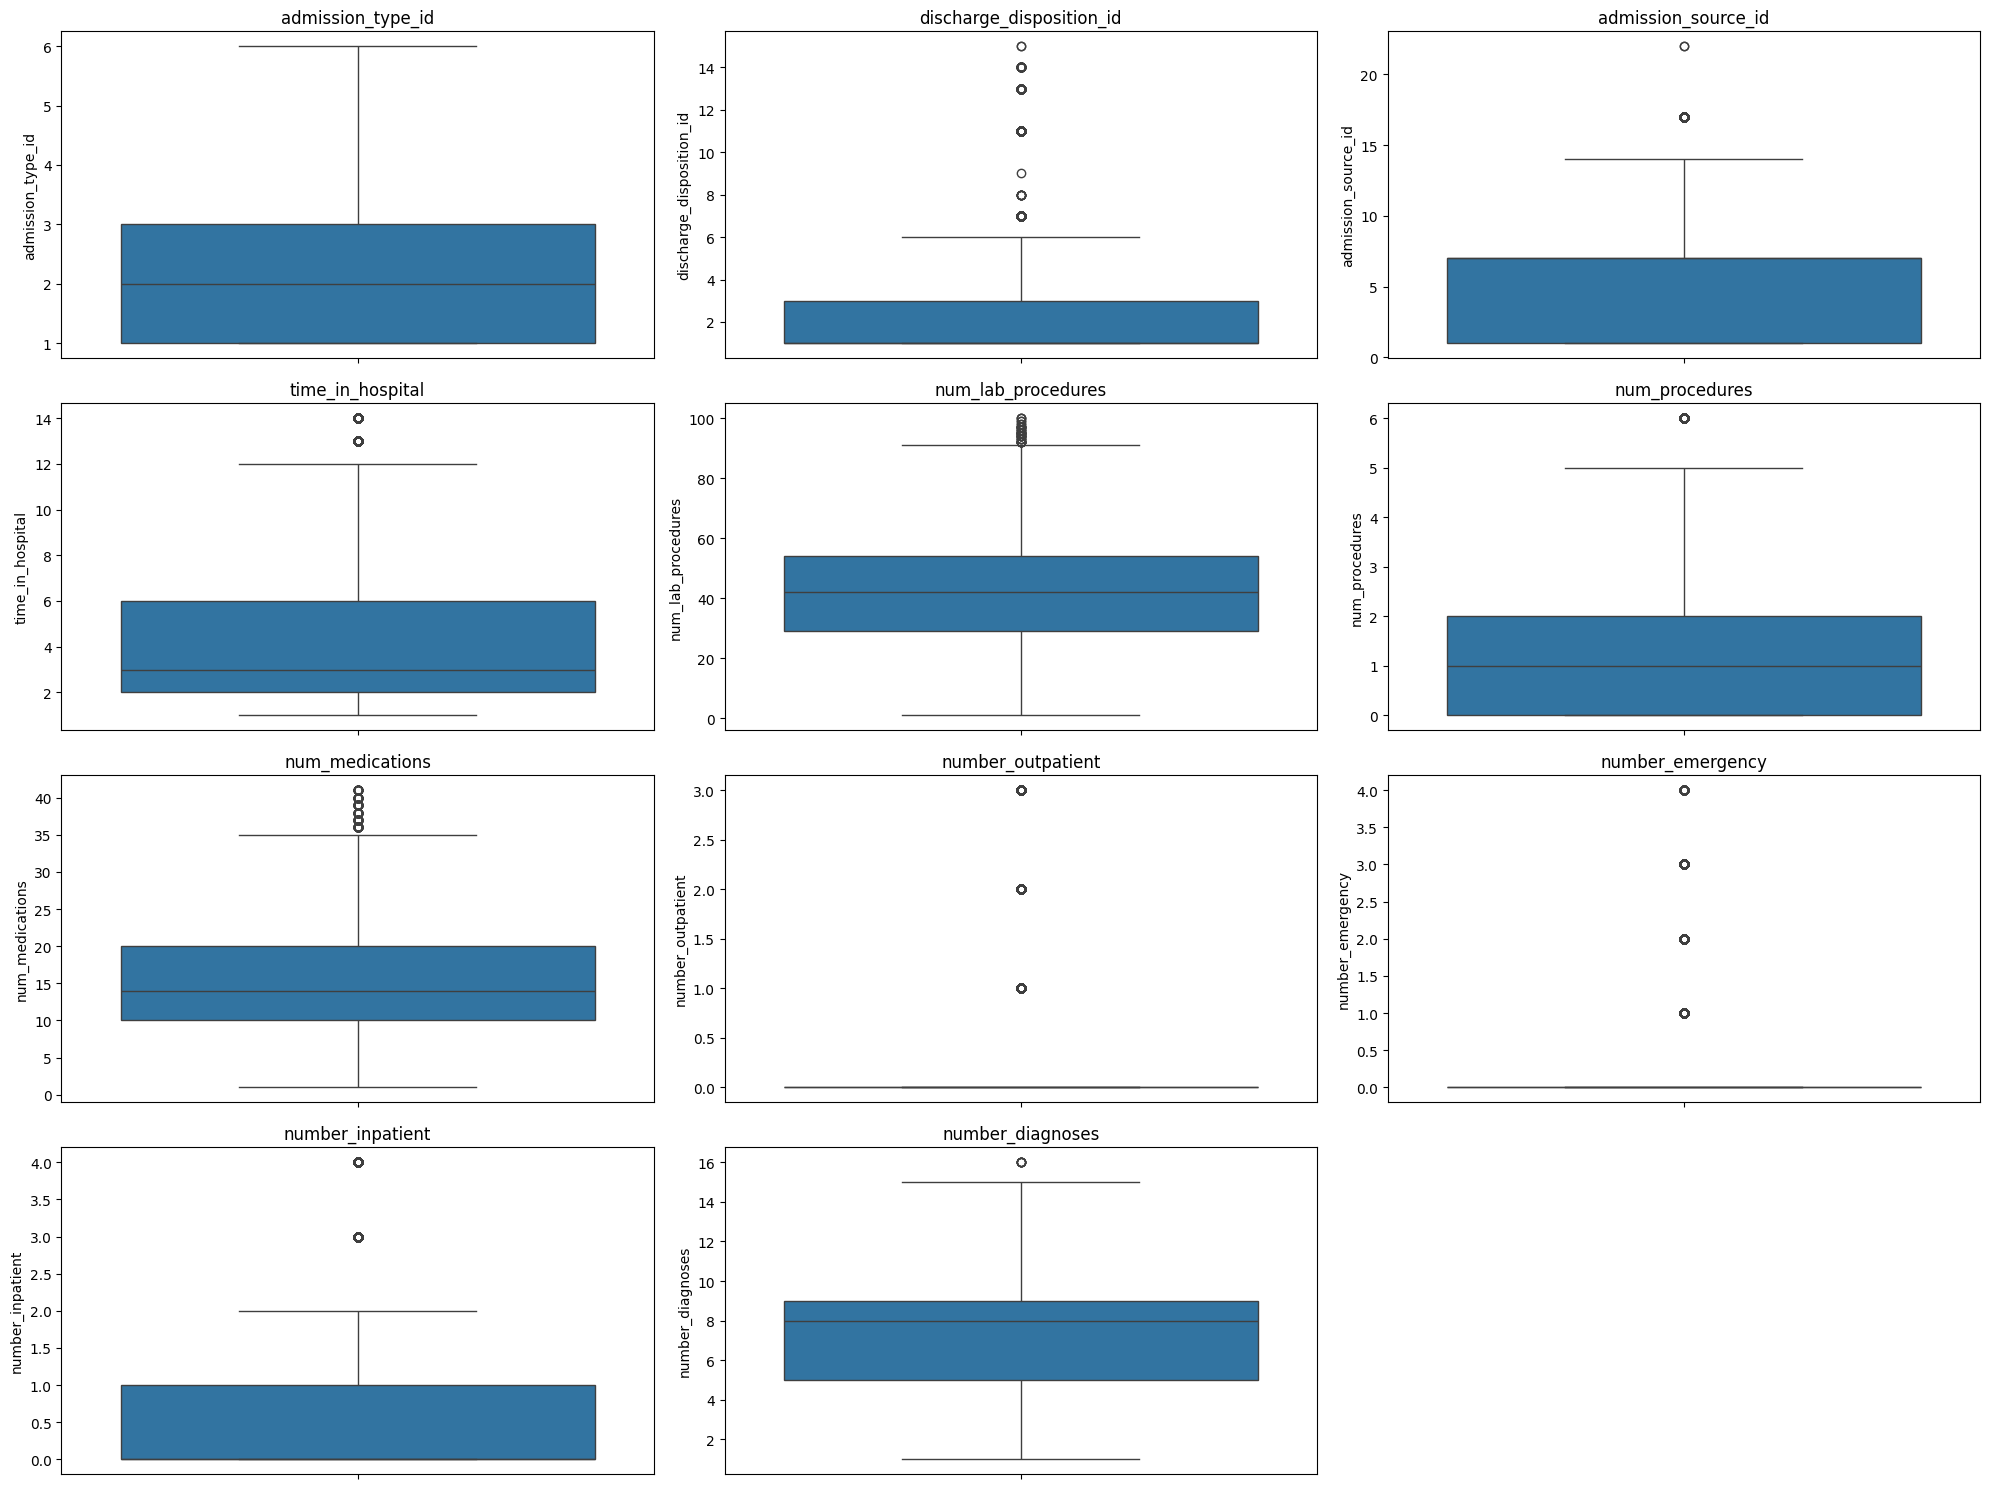

In [22]:
features_boxplot = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Plotting the boxplots for each feature separately
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_boxplot, start=1):
    plt.subplot(4, 3, i)  # Adjust the grid size according to the number of features
    sns.boxplot(y=dataset[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust the layout to not overlap the plots
plt.show()

In [23]:
# Define the columns for which you want to apply IQR
columns_with_iqr = ['num_lab_procedures', 'num_medications']

# Remove outliers from the specified columns using IQR
for column in columns_with_iqr:
    # Calculate the quantiles
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers by filtering the DataFrame
    dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]

In [24]:
dataset.shape

(24962, 25)

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
columns_to_normalize = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_procedures','num_lab_procedures','num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

In [26]:
dataset.shape

(24962, 25)

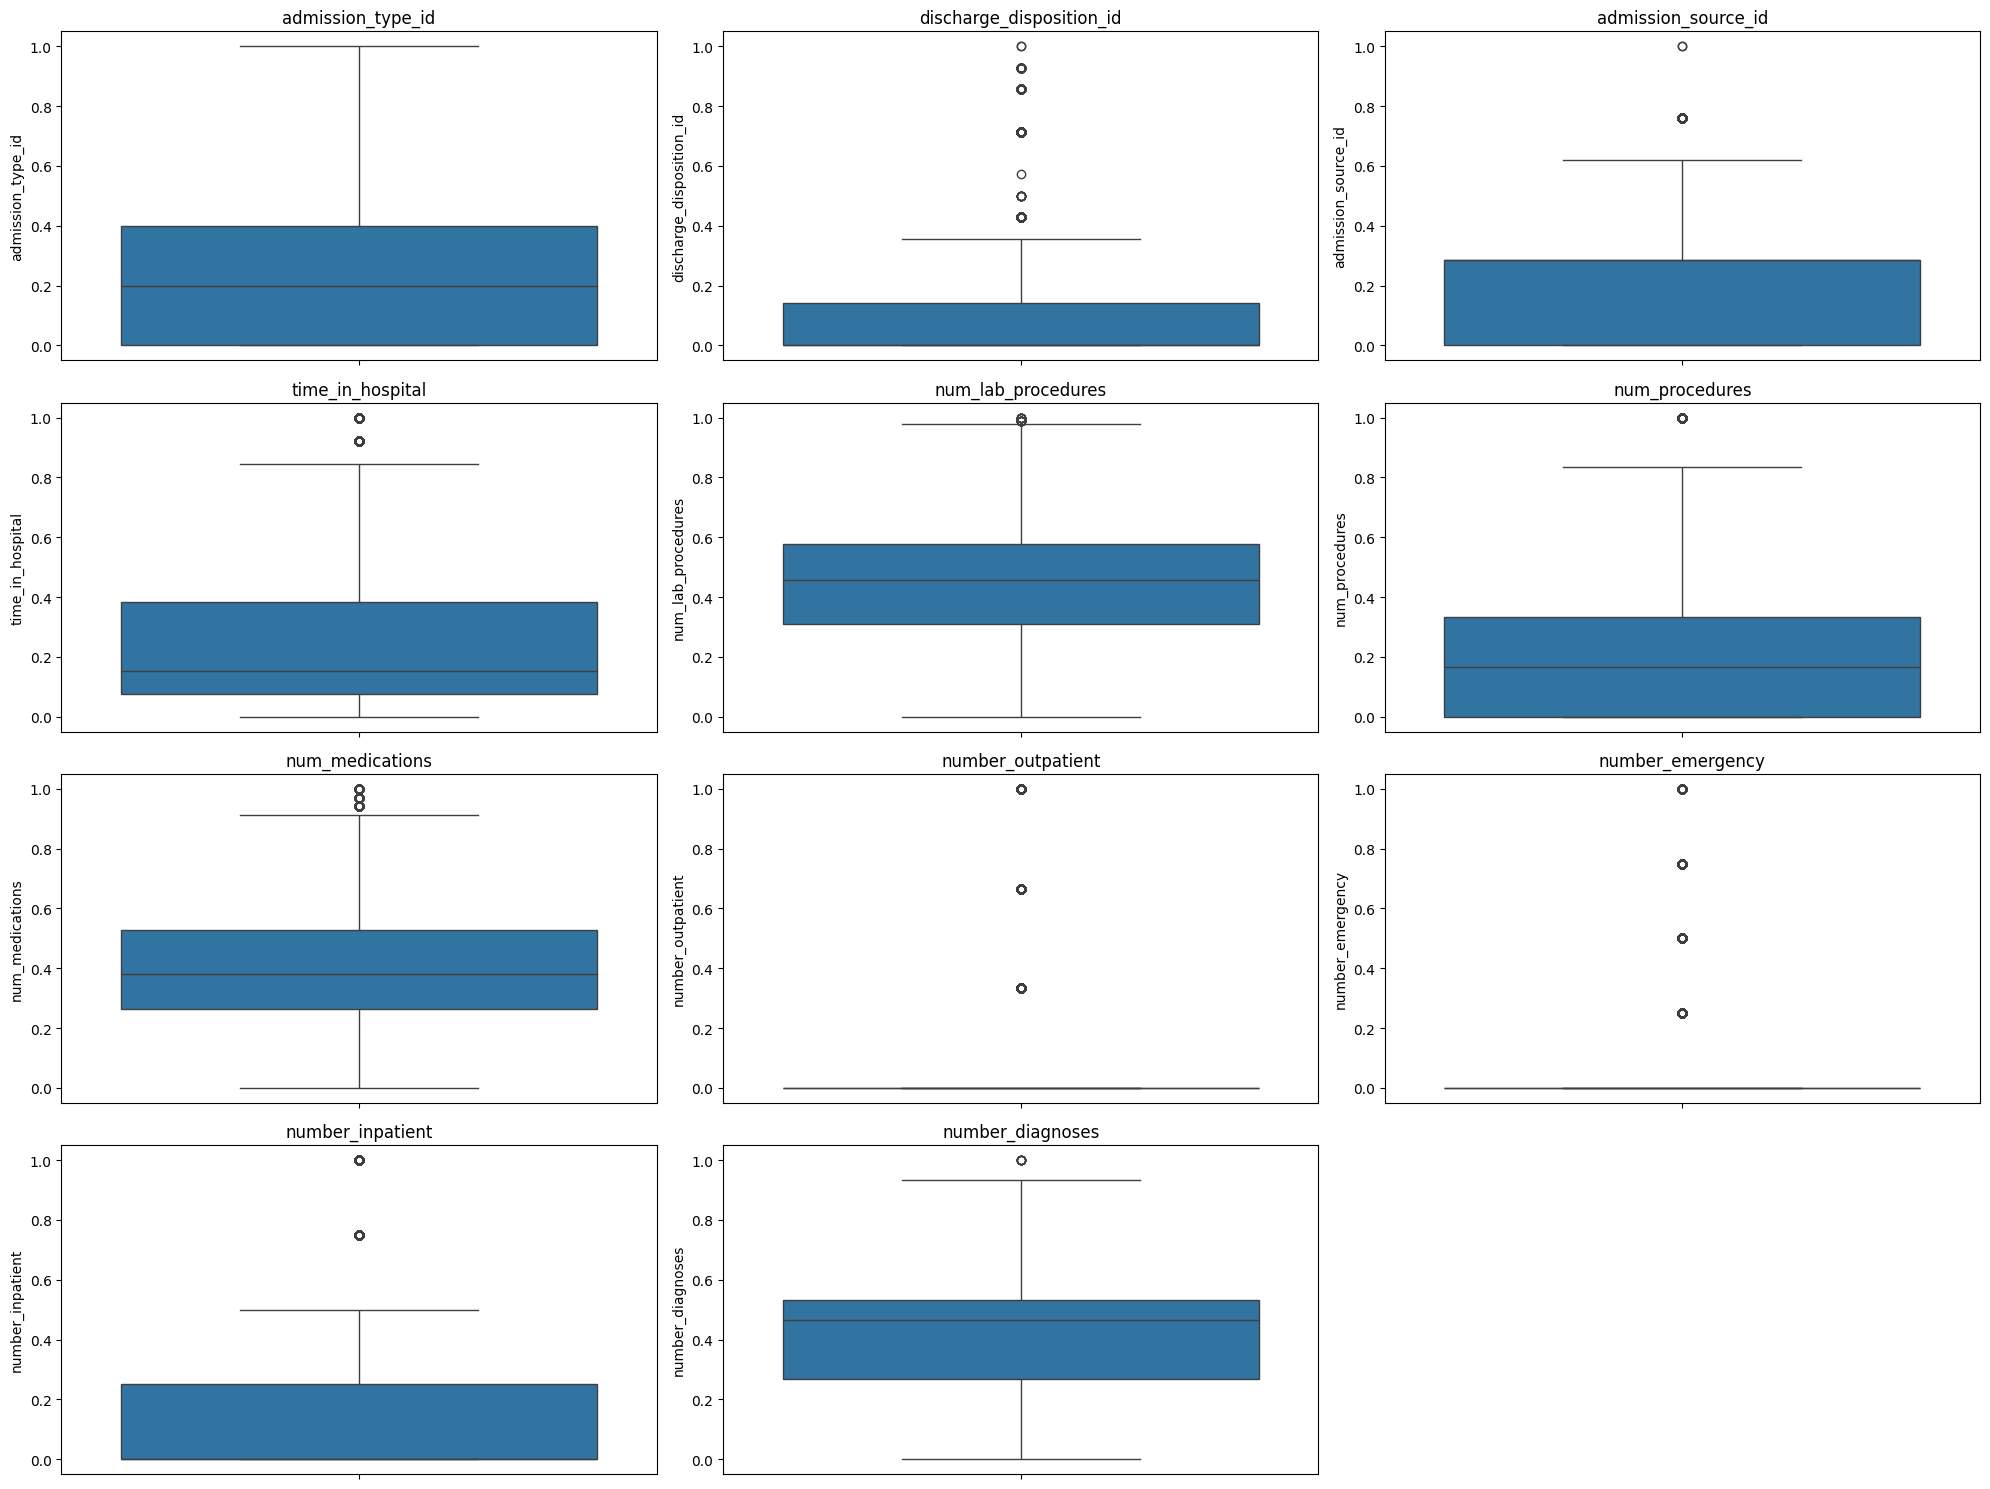

In [27]:
import seaborn as sns
features_boxplot = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Plotting the boxplots for each feature separately
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_boxplot, start=1):
    plt.subplot(4, 3, i)  # Adjust the grid size according to the number of features
    sns.boxplot(y=dataset[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust the layout to not overlap the plots
plt.show()

In [28]:
# Specify the file path where you want to save the cleaned data
output_file_path = "cleaned_data.csv"

# Save the cleaned data to a new CSV file
dataset.to_csv(output_file_path, index=False)

print("Cleaned data has been saved to:", output_file_path)

Cleaned data has been saved to: cleaned_data.csv
